In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Introduction
The economy of Kyrgyzstan, a landlocked nation in Central Asia, is heavily reliant on agriculture. A sizable section of the populace makes their living from farming and raising animals. Agricultural production becomes an important problem for national development because of the difficulties posed by mountainous terrain, a continental climate, and the changing effects of climate change.


# Data Gathering and Cleaning

## Crop


In [2]:
crop=pd.read_csv('crop.csv', delimiter=';')
crop

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year,Unit,Value
0,QC,Crops,113,Kyrgyz Republic,5419,Yield,56,Barley,1990,q/ha,"23,2"
1,QC,Crops,113,Kyrgyz Republic,5419,Yield,56,Barley,1991,q/ha,"19,9"
2,QC,Crops,113,Kyrgyz Republic,5419,Yield,56,Barley,1992,q/ha,"22,2"
3,QC,Crops,113,Kyrgyz Republic,5419,Yield,56,Barley,1993,q/ha,"20,7"
4,QC,Crops,113,Kyrgyz Republic,5419,Yield,56,Barley,1994,q/ha,"14,9"
...,...,...,...,...,...,...,...,...,...,...,...
450,QC,Crops,113,Kyrgyz Republic,5419,Yield,15,Grapes,2020,q/ha,"19,0"
451,QC,Crops,113,Kyrgyz Republic,5419,Yield,15,Grapes,2021,q/ha,"17,1"
452,QC,Crops,113,Kyrgyz Republic,5419,Yield,15,Grapes,2022,q/ha,"17,6"
453,QC,Crops,113,Kyrgyz Republic,5419,Yield,15,Grapes,2023,q/ha,"12,3"


In [3]:
crop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year', 'Unit', 'Value'],
      dtype='object')

In [4]:
crop.dtypes

Domain Code     object
Domain          object
Area Code        int64
Area            object
Element Code     int64
Element         object
Item Code        int64
Item            object
Year             int64
Unit            object
Value           object
dtype: object

In [5]:
print(crop['Domain Code'].unique())
print(crop['Domain'].unique())
print(crop['Area Code'].unique())
print(crop['Element Code'].unique())
print(crop['Element'].unique())
print(crop['Item Code'].unique())
print(crop['Unit'].unique())

['QC']
['Crops']
[113]
[5419]
['Yield']
[ 56 116  27  83 236  15]
['q/ha']


In [6]:
print(crop.columns.tolist())

['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year', 'Unit', 'Value']


In [7]:
crop.drop(['Element Code', 'Element', 'Area Code', 'Domain Code', 'Domain', 'Unit', 'Item Code'], axis=1, inplace=True)
crop

,Area,Item,Year,Value
0,Kyrgyz Republic,Barley,1990,"23,2"
1,Kyrgyz Republic,Barley,1991,"19,9"
2,Kyrgyz Republic,Barley,1992,"22,2"
3,Kyrgyz Republic,Barley,1993,"20,7"
4,Kyrgyz Republic,Barley,1994,"14,9"
...,...,...,...,...
450,Kyrgyz Republic,Grapes,2020,"19,0"
451,Kyrgyz Republic,Grapes,2021,"17,1"
452,Kyrgyz Republic,Grapes,2022,"17,6"
453,Kyrgyz Republic,Grapes,2023,"12,3"


In [8]:
crop.shape

(455, 4)

In [9]:
crop.columns

Index(['Area', 'Item', 'Year', 'Value'], dtype='object')

In [10]:
crop = crop.rename(index=str, columns={"Value": "q/ha yield"})
crop.head()

,Area,Item,Year,q/ha yield
0,Kyrgyz Republic,Barley,1990,"23,2"
1,Kyrgyz Republic,Barley,1991,"19,9"
2,Kyrgyz Republic,Barley,1992,"22,2"
3,Kyrgyz Republic,Barley,1993,"20,7"
4,Kyrgyz Republic,Barley,1994,"14,9"


In [11]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 0 to 454
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        455 non-null    object
 1   Item        455 non-null    object
 2   Year        455 non-null    int64 
 3   q/ha yield  452 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.8+ KB


In [12]:
crop['q/ha yield'].fillna(method='ffill', inplace=True)

In [13]:
crop['q/ha yield'] = crop['q/ha yield'].str.replace(',', '.').str.strip()
crop['q/ha yield'] = pd.to_numeric(crop['q/ha yield'], errors='coerce')  # Convert to float, NaN if fails

In [14]:
crop

,Area,Item,Year,q/ha yield
0,Kyrgyz Republic,Barley,1990,23.2
1,Kyrgyz Republic,Barley,1991,19.9
2,Kyrgyz Republic,Barley,1992,22.2
3,Kyrgyz Republic,Barley,1993,20.7
4,Kyrgyz Republic,Barley,1994,14.9
...,...,...,...,...
450,Kyrgyz Republic,Grapes,2020,19.0
451,Kyrgyz Republic,Grapes,2021,17.1
452,Kyrgyz Republic,Grapes,2022,17.6
453,Kyrgyz Republic,Grapes,2023,12.3


In [15]:
crop['q/ha yield'].info()

<class 'pandas.core.series.Series'>
Index: 455 entries, 0 to 454
Series name: q/ha yield
Non-Null Count  Dtype  
--------------  -----  
455 non-null    float64
dtypes: float64(1)
memory usage: 7.1+ KB


In [16]:
crop.describe()

,Year,q/ha yield
count,455.000000,455.000000
mean,2007.000000,79.842637
std,10.110622,93.706394
min,1990.000000,7.500000
25%,1998.000000,22.550000
50%,2007.000000,32.300000
75%,2016.000000,143.000000
max,2024.000000,710.000000


In [17]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 0 to 454
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        455 non-null    object 
 1   Item        455 non-null    object 
 2   Year        455 non-null    int64  
 3   q/ha yield  455 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.8+ KB


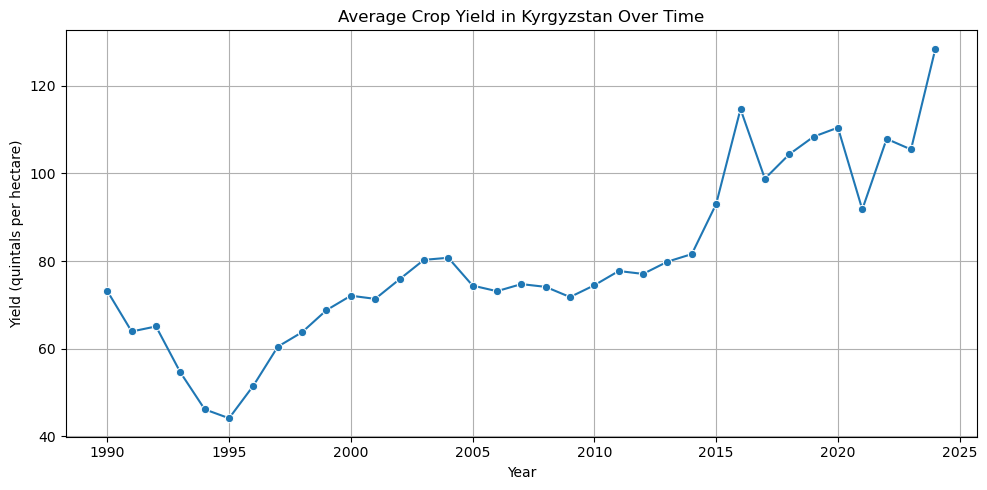

In [18]:
avg_yield_by_year = crop.groupby('Year')['q/ha yield'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_yield_by_year, x='Year', y='q/ha yield', marker='o')
plt.title('Average Crop Yield in Kyrgyzstan Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (quintals per hectare)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Rainfall

In [19]:
rain=pd.read_csv('rainfall_kg.csv',delimiter=';')
rain

,Area,Year,average_rain_fall_mm_per_year
0,Kyrgyz Republic,1985,415.19
1,Kyrgyz Republic,1986,411.57
2,Kyrgyz Republic,1987,653.29
3,Kyrgyz Republic,1989,487.08
4,Kyrgyz Republic,1990,455.06
5,Kyrgyz Republic,1991,NaN
6,Kyrgyz Republic,1992,491.96
7,Kyrgyz Republic,1993,635.75
8,Kyrgyz Republic,1994,439.62
9,Kyrgyz Republic,1995,NaN


In [20]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          39 non-null     object 
 1   Year                           39 non-null     int64  
 2   average_rain_fall_mm_per_year  34 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [21]:
rain =rain.rename(index=str, columns={"average_rain_fall_mm_per_year": 'Average Rainfall(mm)'})

In [22]:
rain =rain.rename(index=str, columns={" Area": 'Area'})

In [23]:
rain[rain['Average Rainfall(mm)'].isna()]

,Area,Year,Average Rainfall(mm)
5,Kyrgyz Republic,1991,NaN
9,Kyrgyz Republic,1995,NaN
16,Kyrgyz Republic,2002,NaN
17,Kyrgyz Republic,2003,NaN
38,Kyrgyz Republic,2024,NaN


In [24]:
rain.fillna(rain['Average Rainfall(mm)'].mean(), inplace=True)
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  39 non-null     object 
 1   Year                  39 non-null     int64  
 2   Average Rainfall(mm)  39 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [25]:
rain

,Area,Year,Average Rainfall(mm)
0,Kyrgyz Republic,1985,415.190000
1,Kyrgyz Republic,1986,411.570000
2,Kyrgyz Republic,1987,653.290000
3,Kyrgyz Republic,1989,487.080000
4,Kyrgyz Republic,1990,455.060000
5,Kyrgyz Republic,1991,472.607059
6,Kyrgyz Republic,1992,491.960000
7,Kyrgyz Republic,1993,635.750000
8,Kyrgyz Republic,1994,439.620000
9,Kyrgyz Republic,1995,472.607059


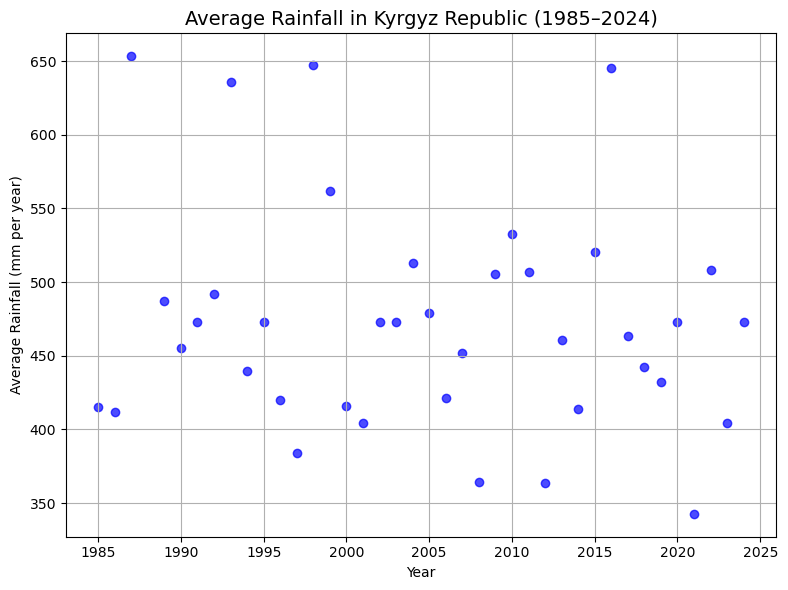

In [26]:
# Rainfall scatter plot
plt.figure(figsize=(8,6))
plt.scatter(rain['Year'], rain['Average Rainfall(mm)'], color='blue', alpha=0.7)

plt.title("Average Rainfall in Kyrgyz Republic (1985–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm per year)")
plt.grid(True)
plt.tight_layout()
plt.show()

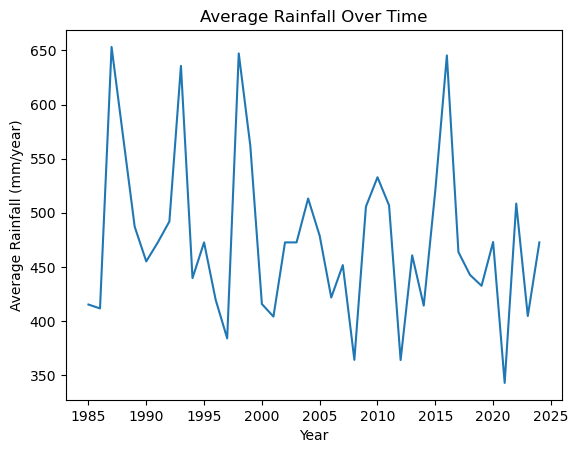

In [27]:
# Line plot for Rainfall
rain.groupby('Year')['Average Rainfall(mm)'].mean().plot()
plt.title('Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm/year)')
plt.show()

In [28]:
min_rain = rain.loc[rain['Average Rainfall(mm)'].idxmin()]
print('Minimum Rainfall:',min_rain)


max_rain = rain.loc[rain['Average Rainfall(mm)'].idxmax()]
print('\nMaximum Rainfall:',max_rain)

Minimum Rainfall: Area                    Kyrgyz Republic
Year                               2021
Average Rainfall(mm)             342.72
Name: 35, dtype: object

Maximum Rainfall: Area                    Kyrgyz Republic
Year                               1987
Average Rainfall(mm)             653.29
Name: 2, dtype: object


In [29]:
rain.describe() # min rainfall was in 2021(record) we researched it and the сахарной свеклы упала на 33%

,Year,Average Rainfall(mm)
count,39.000000,39.000000
mean,2004.923077,472.607059
std,11.528876,76.205542
min,1985.000000,342.720000
25%,1995.500000,417.685000
50%,2005.000000,472.607059
75%,2014.500000,506.245000
max,2024.000000,653.290000


## Temperature

In [30]:
avg_temp=pd.read_csv('kg_avg_temperature.csv',delimiter=';')
avg_temp

,Area,Year,Average Temperature (°C)
0,Kyrgyz Republic,1985,1.60
1,Kyrgyz Republic,1986,1.97
2,Kyrgyz Republic,1987,2.60
3,Kyrgyz Republic,1988,2.41
4,Kyrgyz Republic,1989,NaN
5,Kyrgyz Republic,1990,NaN
6,Kyrgyz Republic,1991,2.15
7,Kyrgyz Republic,1992,1.96
8,Kyrgyz Republic,1993,1.90
9,Kyrgyz Republic,1994,1.79


In [31]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      40 non-null     object 
 1   Year                      40 non-null     int64  
 2   Average Temperature (°C)  34 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [32]:
avg_temp.fillna(avg_temp['Average Temperature (°C)'].median(), inplace=True)

In [33]:
avg_temp.describe()

,Year,Average Temperature (°C)
count,40.000000,40.000000
mean,2004.500000,2.891750
std,11.690452,0.694738
min,1985.000000,1.600000
25%,1994.750000,2.425000
50%,2004.500000,2.840000
75%,2014.250000,3.437500
max,2024.000000,4.300000


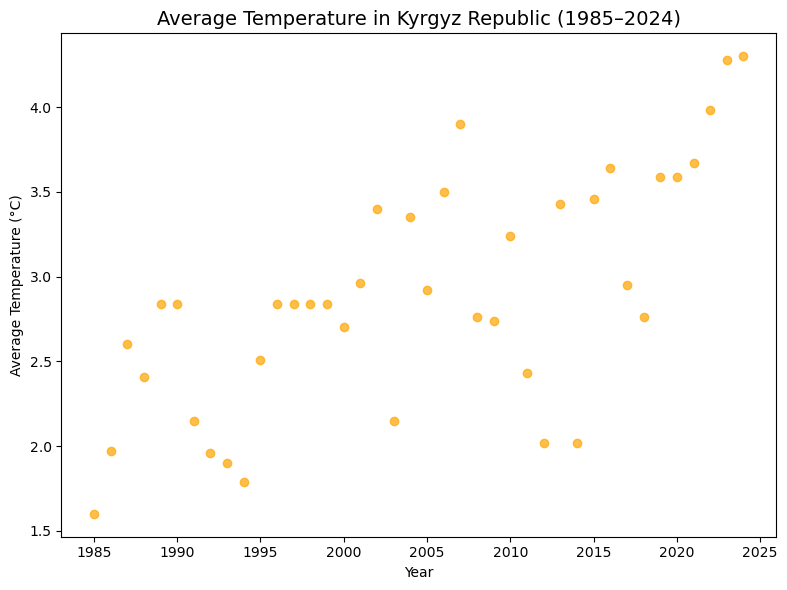

In [34]:
# Average Temp scatter plot
plt.figure(figsize=(8,6))
plt.scatter(avg_temp['Year'], avg_temp['Average Temperature (°C)'], color='orange', alpha=0.7)

plt.title("Average Temperature in Kyrgyz Republic (1985–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.tight_layout()
plt.show()

In [35]:
min_temp = avg_temp.loc[avg_temp['Average Temperature (°C)'].idxmin()]
print('Minimum Temperature:',min_temp)


max_temp = avg_temp.loc[avg_temp['Average Temperature (°C)'].idxmax()]
print('\nMaximum Temperature:',max_temp)

Minimum Temperature: Area                        Kyrgyz Republic
Year                                   1985
Average Temperature (°C)                1.6
Name: 0, dtype: object

Maximum Temperature: Area                        Kyrgyz Republic
Year                                   2024
Average Temperature (°C)                4.3
Name: 39, dtype: object


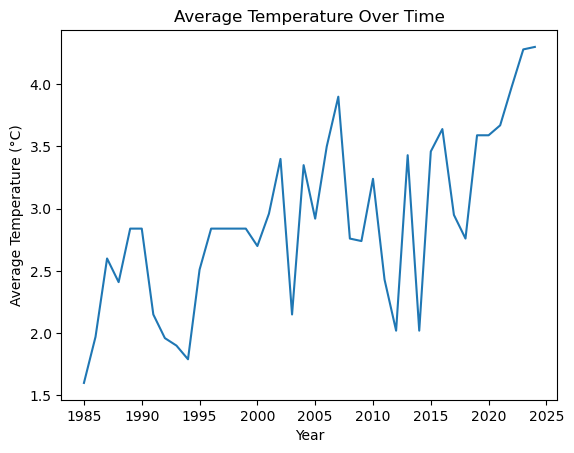

In [36]:
# Line plot for Temperature
avg_temp.groupby('Year')['Average Temperature (°C)'].mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show() # we can see an upward trend which means that the temperature grows since 2019

## Pesticides

In [37]:
pesticides=pd.read_csv('pesticides_kg.csv')
pesticides

,Area,Element,Item,Year,Unit,Value
0,Kyrgyz Repubic,Use,Pesticides (total),1985,tonnes of active ingredients,NaN
1,Kyrgyz Repubic,Use,Pesticides (total),1986,tonnes of active ingredients,NaN
2,Kyrgyz Repubic,Use,Pesticides (total),1987,tonnes of active ingredients,NaN
3,Kyrgyz Repubic,Use,Pesticides (total),1988,tonnes of active ingredients,NaN
4,Kyrgyz Repubic,Use,Pesticides (total),1989,tonnes of active ingredients,NaN
5,Kyrgyz Repubic,Use,Pesticides (total),1990,tonnes of active ingredients,NaN
6,Kyrgyz Repubic,Use,Pesticides (total),1991,tonnes of active ingredients,NaN
7,Kyrgyz Repubic,Use,Pesticides (total),1992,tonnes of active ingredients,2418.00
8,Kyrgyz Repubic,Use,Pesticides (total),1993,tonnes of active ingredients,2200.86
9,Kyrgyz Repubic,Use,Pesticides (total),1994,tonnes of active ingredients,1983.72


In [38]:
pesticides.drop(['Element','Item','Unit'], axis=1, inplace=True)
pesticides

,Area,Year,Value
0,Kyrgyz Repubic,1985,NaN
1,Kyrgyz Repubic,1986,NaN
2,Kyrgyz Repubic,1987,NaN
3,Kyrgyz Repubic,1988,NaN
4,Kyrgyz Repubic,1989,NaN
5,Kyrgyz Repubic,1990,NaN
6,Kyrgyz Repubic,1991,NaN
7,Kyrgyz Repubic,1992,2418.00
8,Kyrgyz Repubic,1993,2200.86
9,Kyrgyz Repubic,1994,1983.72


In [39]:
pesticides = pesticides.rename(index=str, columns={" Area": "Area"})
pesticides.head()

,Area,Year,Value
0,Kyrgyz Repubic,1985,NaN
1,Kyrgyz Repubic,1986,NaN
2,Kyrgyz Repubic,1987,NaN
3,Kyrgyz Repubic,1988,NaN
4,Kyrgyz Repubic,1989,NaN


In [40]:
pesticides['Area'] = pesticides['Area'].replace('Kyrgyz Repubic', 'Kyrgyz Republic')

In [41]:
pesticides = pesticides.rename(index=str, columns={"Value": "Pesticide Usage(tonnes)"})
pesticides.head()

,Area,Year,Pesticide Usage(tonnes)
0,Kyrgyz Republic,1985,NaN
1,Kyrgyz Republic,1986,NaN
2,Kyrgyz Republic,1987,NaN
3,Kyrgyz Republic,1988,NaN
4,Kyrgyz Republic,1989,NaN


In [42]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     40 non-null     object 
 1   Year                     40 non-null     int64  
 2   Pesticide Usage(tonnes)  31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [43]:
pesticides.describe()

,Year,Pesticide Usage(tonnes)
count,40.000000,31.000000
mean,2004.500000,912.559355
std,11.690452,572.890864
min,1985.000000,266.800000
25%,1994.750000,546.400000
50%,2004.500000,680.900000
75%,2014.250000,1208.885000
max,2024.000000,2418.000000


In [44]:
min_row = pesticides.loc[pesticides['Pesticide Usage(tonnes)'].idxmin()]
print('Minimum Pesticides Use:',min_row)


max_row = pesticides.loc[pesticides['Pesticide Usage(tonnes)'].idxmax()]
print('\nMaximum Pesticides Use:',max_row)

Minimum Pesticides Use: Area                       Kyrgyz Republic
Year                                  2009
Pesticide Usage(tonnes)              266.8
Name: 24, dtype: object

Maximum Pesticides Use: Area                       Kyrgyz Republic
Year                                  1992
Pesticide Usage(tonnes)             2418.0
Name: 7, dtype: object


In [45]:
pesticides['Pesticide Usage(tonnes)'] = pesticides['Pesticide Usage(tonnes)'].fillna(method='bfill')  # For 1985–1991
pesticides['Pesticide Usage(tonnes)'] = pesticides['Pesticide Usage(tonnes)'].fillna(method='ffill')  # For 2023–2024

In [46]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     40 non-null     object 
 1   Year                     40 non-null     int64  
 2   Pesticide Usage(tonnes)  40 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ KB


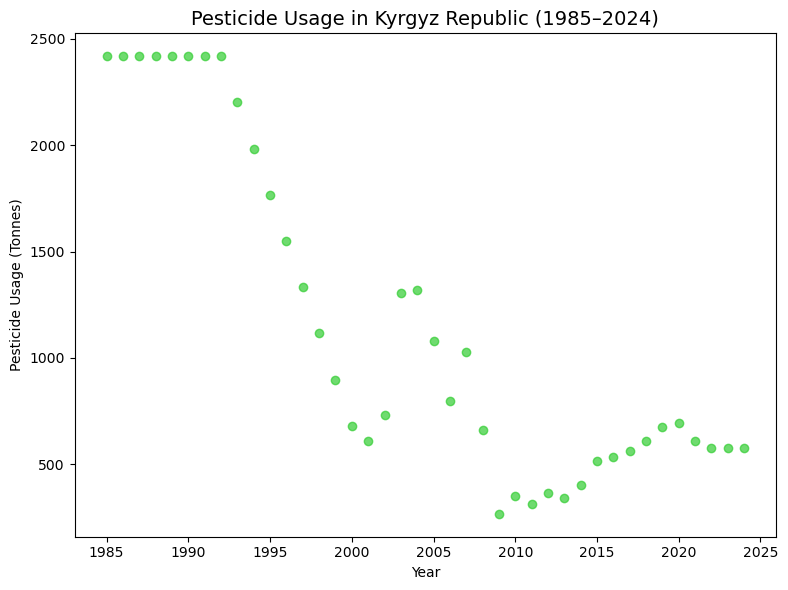

In [47]:
# Scatter plot for pesticides
plt.figure(figsize=(8,6))
plt.scatter(pesticides['Year'], pesticides['Pesticide Usage(tonnes)'], color='limegreen', alpha=0.7)

plt.title("Pesticide Usage in Kyrgyz Republic (1985–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Pesticide Usage (Tonnes)")
plt.tight_layout()
plt.show()

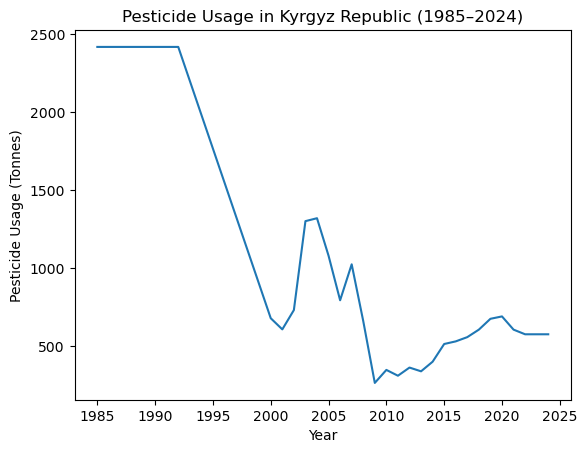

In [48]:
# Line plot for Pesticides
pesticides.groupby('Year')['Pesticide Usage(tonnes)'].mean().plot()
plt.title('Pesticide Usage in Kyrgyz Republic (1985–2024)')
plt.xlabel('Year')
plt.ylabel('Pesticide Usage (Tonnes)')
plt.show()

## Merging data

In [49]:
# Merging rain and crop
yield_df = pd.merge(crop,rain, on=['Year','Area'])

In [50]:
yield_df.shape

(455, 5)

In [51]:
yield_df.head()

,Area,Item,Year,q/ha yield,Average Rainfall(mm)
0,Kyrgyz Republic,Barley,1990,23.2,455.06
1,Kyrgyz Republic,Potatoes,1990,137.0,455.06
2,Kyrgyz Republic,Rice,1990,19.1,455.06
3,Kyrgyz Republic,Corn,1990,62.5,455.06
4,Kyrgyz Republic,Leguminous,1990,13.0,455.06


In [52]:
yield_df.describe()

,Year,q/ha yield,Average Rainfall(mm)
count,455.000000,455.000000,455.000000
mean,2007.000000,79.842637,470.415580
std,10.110622,93.706394,71.918319
min,1990.000000,7.500000,342.720000
25%,1998.000000,22.550000,419.710000
50%,2007.000000,32.300000,472.607059
75%,2016.000000,143.000000,506.820000
max,2024.000000,710.000000,647.290000


In [53]:
# Merging yield and temperature
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,q/ha yield,Average Rainfall(mm),Average Temperature (°C)
0,Kyrgyz Republic,Barley,1990,23.2,455.06,2.84
1,Kyrgyz Republic,Potatoes,1990,137.0,455.06,2.84
2,Kyrgyz Republic,Rice,1990,19.1,455.06,2.84
3,Kyrgyz Republic,Corn,1990,62.5,455.06,2.84
4,Kyrgyz Republic,Leguminous,1990,13.0,455.06,2.84


In [54]:
yield_df.shape

(455, 6)

In [55]:
yield_df.describe()

,Year,q/ha yield,Average Rainfall(mm),Average Temperature (°C)
count,455.000000,455.000000,455.000000,455.000000
mean,2007.000000,79.842637,470.415580,2.978571
std,10.110622,93.706394,71.918319,0.670958
min,1990.000000,7.500000,342.720000,1.790000
25%,1998.000000,22.550000,419.710000,2.510000
50%,2007.000000,32.300000,472.607059,2.840000
75%,2016.000000,143.000000,506.820000,3.500000
max,2024.000000,710.000000,647.290000,4.300000


In [56]:
# Merging yield and pesticides
yield_df = pd.merge(yield_df, pesticides, on=['Area', 'Year'])
yield_df.head()

,Area,Item,Year,q/ha yield,Average Rainfall(mm),Average Temperature (°C),Pesticide Usage(tonnes)
0,Kyrgyz Republic,Barley,1990,23.2,455.06,2.84,2418.0
1,Kyrgyz Republic,Potatoes,1990,137.0,455.06,2.84,2418.0
2,Kyrgyz Republic,Rice,1990,19.1,455.06,2.84,2418.0
3,Kyrgyz Republic,Corn,1990,62.5,455.06,2.84,2418.0
4,Kyrgyz Republic,Leguminous,1990,13.0,455.06,2.84,2418.0


In [57]:
yield_df.shape

(455, 7)

In [58]:
yield_df.isnull().sum()

Area                        0
Item                        0
Year                        0
q/ha yield                  0
Average Rainfall(mm)        0
Average Temperature (°C)    0
Pesticide Usage(tonnes)     0
dtype: int64

##### Great, no empty values!

# Data Exploration

- yield_df is the final obtained dataframe

In [59]:
yield_df.groupby('Item').count()

,Area,Year,q/ha yield,Average Rainfall(mm),Average Temperature (°C),Pesticide Usage(tonnes)
Item,,,,,,
Barley,35,35,35,35,35,35
Corn,35,35,35,35,35,35
Cotton,35,35,35,35,35,35
Fruits and berries,35,35,35,35,35,35
Grains,35,35,35,35,35,35
Grapes,35,35,35,35,35,35
Leguminous,35,35,35,35,35,35
Melons,35,35,35,35,35,35
Potatoes,35,35,35,35,35,35


In [60]:
yield_df.describe()

,Year,q/ha yield,Average Rainfall(mm),Average Temperature (°C),Pesticide Usage(tonnes)
count,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2007.000000,79.842637,470.415580,2.978571,979.478286
std,10.110622,93.706394,71.918319,0.670958,643.150668
min,1990.000000,7.500000,342.720000,1.790000,266.800000
25%,1998.000000,22.550000,419.710000,2.510000,560.000000
50%,2007.000000,32.300000,472.607059,2.840000,680.900000
75%,2016.000000,143.000000,506.820000,3.500000,1321.300000
max,2024.000000,710.000000,647.290000,4.300000,2418.000000


In [61]:
yield_df.groupby(['Area'],sort=True)['q/ha yield'].sum()

Area
Kyrgyz Republic    36328.4
Name: q/ha yield, dtype: float64

In [62]:
# The most q/ha yield 
yield_df.groupby(['Item','Area'],sort=True)['q/ha yield'].sum().nlargest(13)

Item                Area           
Sugar-beet          Kyrgyz Republic    9608.4
Melons              Kyrgyz Republic    6179.1
Vegetables          Kyrgyz Republic    6088.7
Potatoes            Kyrgyz Republic    5277.0
Corn                Kyrgyz Republic    2030.5
Fruits and berries  Kyrgyz Republic    1400.7
Cotton              Kyrgyz Republic     986.2
Rice                Kyrgyz Republic     980.5
Grains              Kyrgyz Republic     935.5
Grapes              Kyrgyz Republic     796.3
Wheat               Kyrgyz Republic     794.1
Barley              Kyrgyz Republic     696.9
Leguminous          Kyrgyz Republic     554.5
Name: q/ha yield, dtype: float64

In [63]:
# Add a new column 'rainfall_to_temp_ratio'
yield_df['rainfall_to_temp_ratio'] = yield_df['Average Rainfall(mm)'] / yield_df['Average Temperature (°C)']


In [64]:
yield_df

,Area,Item,Year,q/ha yield,Average Rainfall(mm),Average Temperature (°C),Pesticide Usage(tonnes),rainfall_to_temp_ratio
0,Kyrgyz Republic,Barley,1990,23.2,455.060000,2.84,2418.0,160.232394
1,Kyrgyz Republic,Potatoes,1990,137.0,455.060000,2.84,2418.0,160.232394
2,Kyrgyz Republic,Rice,1990,19.1,455.060000,2.84,2418.0,160.232394
3,Kyrgyz Republic,Corn,1990,62.5,455.060000,2.84,2418.0,160.232394
4,Kyrgyz Republic,Leguminous,1990,13.0,455.060000,2.84,2418.0,160.232394
...,...,...,...,...,...,...,...,...
450,Kyrgyz Republic,Melons,2024,247.3,472.607059,4.30,578.2,109.908618
451,Kyrgyz Republic,Wheat,2024,27.7,472.607059,4.30,578.2,109.908618
452,Kyrgyz Republic,Grains,2024,34.6,472.607059,4.30,578.2,109.908618
453,Kyrgyz Republic,Cotton,2024,35.9,472.607059,4.30,578.2,109.908618


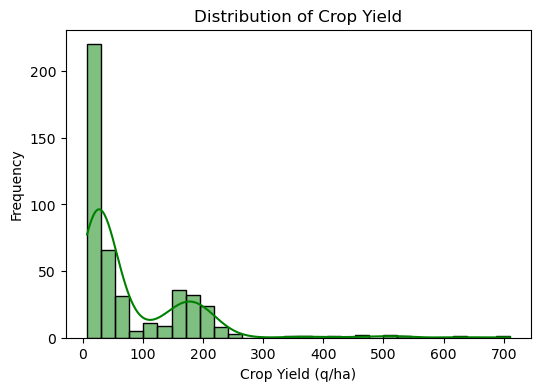

In [65]:
plt.figure(figsize=(6, 4))
sns.histplot(yield_df['q/ha yield'], bins=30, kde=True, color='green')
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (q/ha)')
plt.ylabel('Frequency')
plt.show()

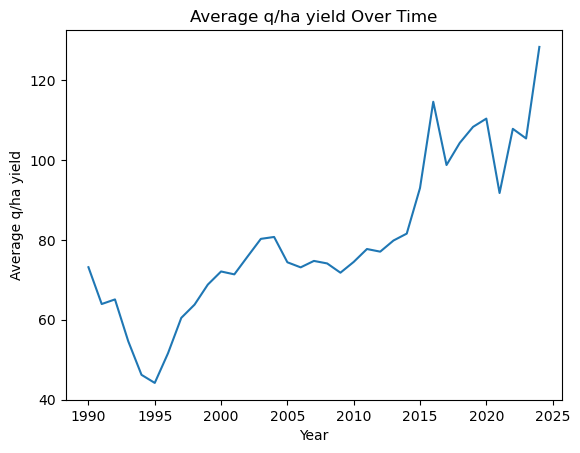

In [66]:
# Line plot of q/ha 
yield_df.groupby('Year')['q/ha yield'].mean().plot()
plt.title('Average q/ha yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average q/ha yield')
plt.show()

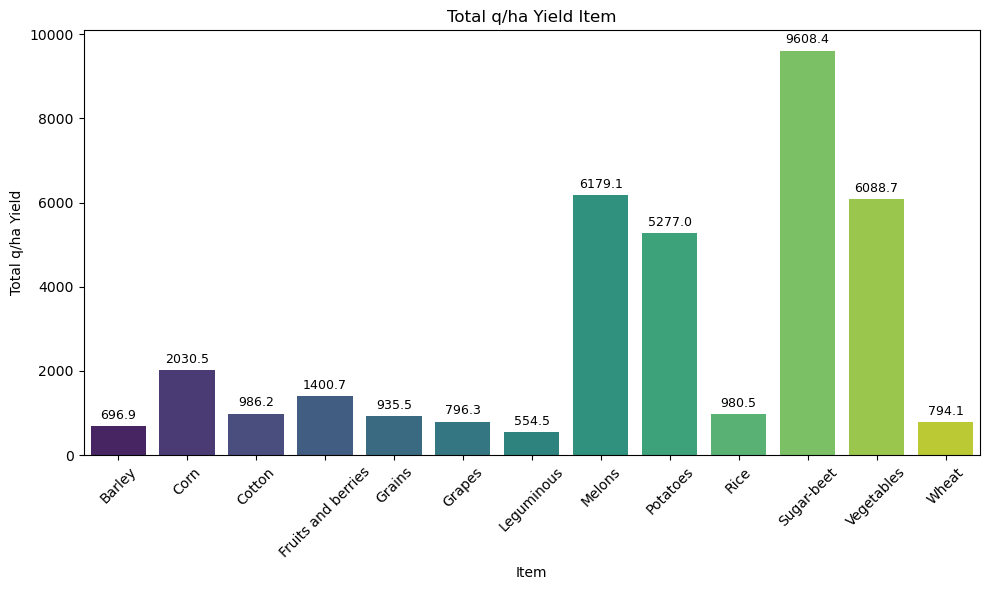

In [67]:
# Bar chart for each item with their total numbers
yield_bar = yield_df.groupby('Item')['q/ha yield'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Item', y='q/ha yield', data=yield_bar, palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.title("Total q/ha Yield Item")
plt.xlabel("Item")
plt.ylabel("Total q/ha Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_1004\1364666719.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


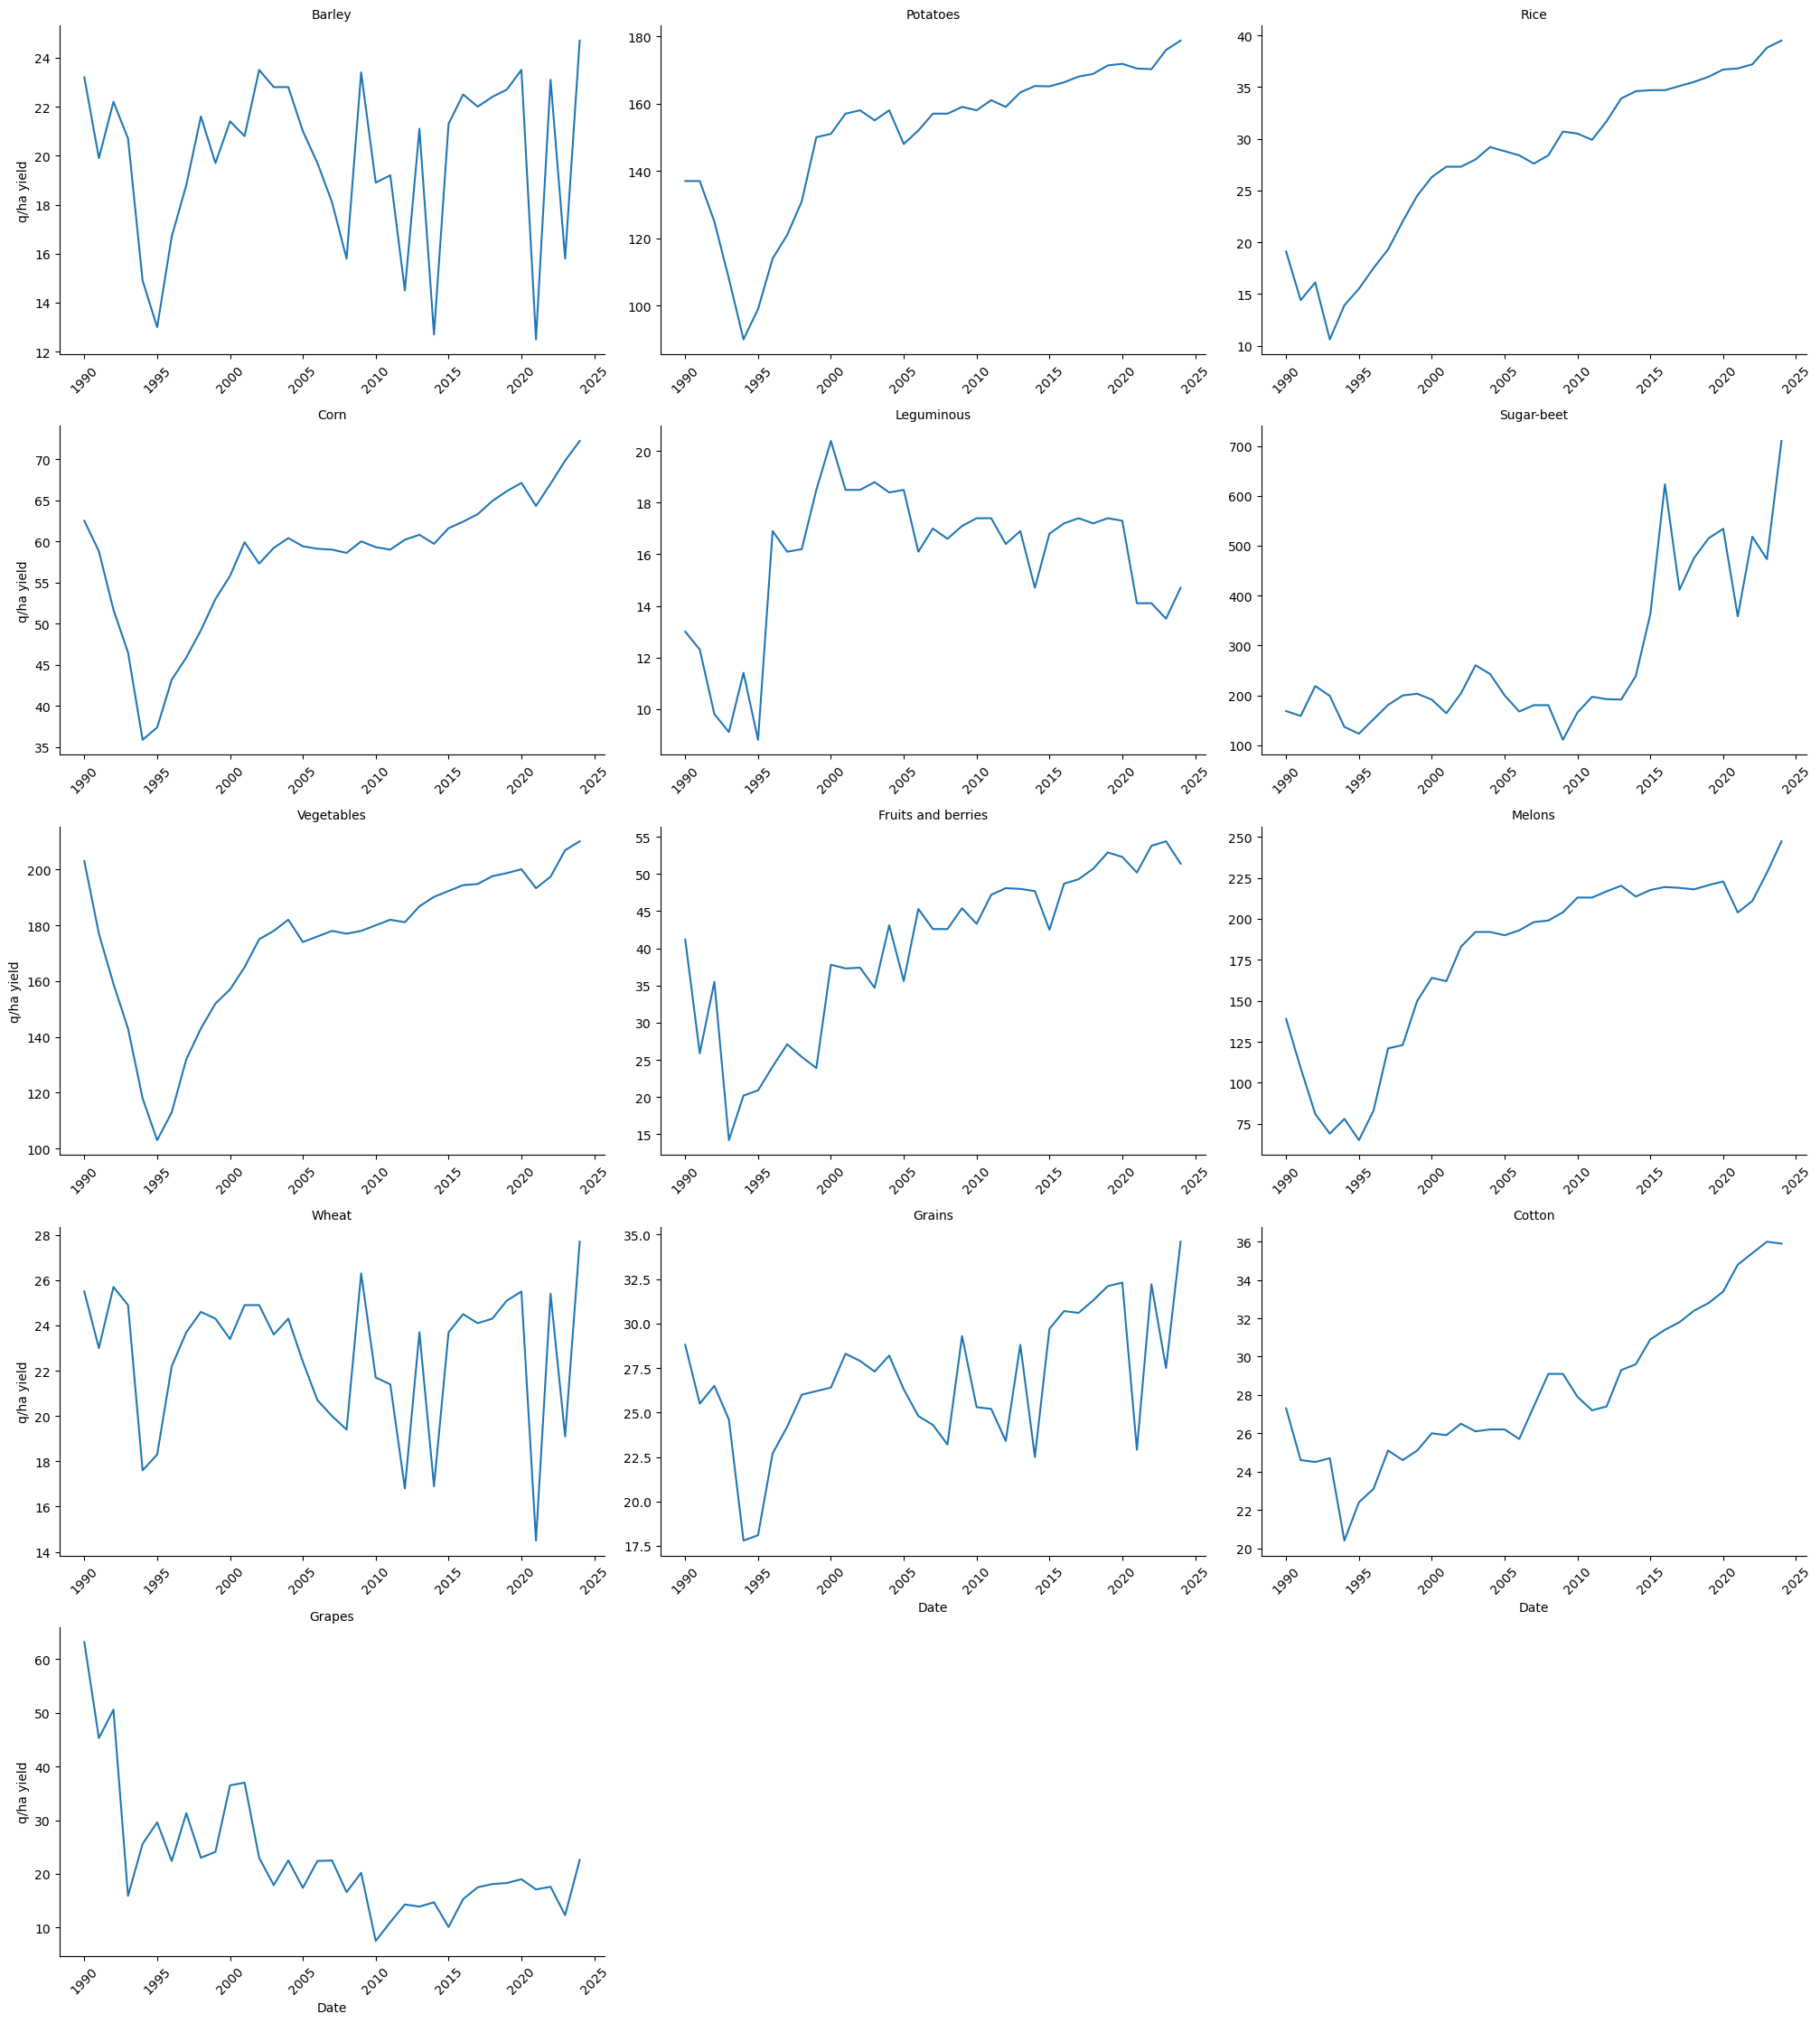

In [68]:
items = ['Barley', 'Corn', 'Fruits and berries', 'Leguminous', 'Melons','Potatoes','Rice','Sugar-beet','Vegetables','Wheat','Cotton','Grains','Grapes']
item_df = yield_df[yield_df['Item'].isin(items)]
g = sns.FacetGrid(item_df, col='Item', col_wrap=3, height=4.5, aspect=1.5, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='q/ha yield')
g.set_titles('{col_name}')
g.set_axis_labels('Date', 'q/ha yield')

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [69]:
grouped = yield_df.groupby('Item')[['Average Temperature (°C)', 'q/ha yield']].corr().iloc[0::2, -1]
print(grouped)

Item                                        
Barley              Average Temperature (°C)    0.270515
Corn                Average Temperature (°C)    0.617957
Cotton              Average Temperature (°C)    0.694635
Fruits and berries  Average Temperature (°C)    0.598444
Grains              Average Temperature (°C)    0.560143
Grapes              Average Temperature (°C)   -0.277313
Leguminous          Average Temperature (°C)    0.298486
Melons              Average Temperature (°C)    0.598258
Potatoes            Average Temperature (°C)    0.622042
Rice                Average Temperature (°C)    0.665530
Sugar-beet          Average Temperature (°C)    0.607906
Vegetables          Average Temperature (°C)    0.526775
Wheat               Average Temperature (°C)    0.193294
Name: q/ha yield, dtype: float64


In [70]:
grouped = yield_df.groupby('Item')[['Average Rainfall(mm)', 'q/ha yield']].corr().iloc[0::2, -1]
print(grouped)


Item                                    
Barley              Average Rainfall(mm)    0.469976
Corn                Average Rainfall(mm)   -0.129061
Cotton              Average Rainfall(mm)   -0.132721
Fruits and berries  Average Rainfall(mm)   -0.283222
Grains              Average Rainfall(mm)    0.243284
Grapes              Average Rainfall(mm)   -0.112288
Leguminous          Average Rainfall(mm)   -0.081416
Melons              Average Rainfall(mm)   -0.161217
Potatoes            Average Rainfall(mm)   -0.140011
Rice                Average Rainfall(mm)   -0.180503
Sugar-beet          Average Rainfall(mm)    0.118312
Vegetables          Average Rainfall(mm)   -0.082944
Wheat               Average Rainfall(mm)    0.508735
Name: q/ha yield, dtype: float64


In [71]:
grouped = yield_df.groupby('Item')[['Pesticide Usage(tonnes)', 'q/ha yield']].corr().iloc[0::2, -1]
print(grouped)

Item                                       
Barley              Pesticide Usage(tonnes)   -0.010124
Corn                Pesticide Usage(tonnes)   -0.561687
Cotton              Pesticide Usage(tonnes)   -0.600720
Fruits and berries  Pesticide Usage(tonnes)   -0.699148
Grains              Pesticide Usage(tonnes)   -0.359250
Grapes              Pesticide Usage(tonnes)    0.704610
Leguminous          Pesticide Usage(tonnes)   -0.642316
Melons              Pesticide Usage(tonnes)   -0.839618
Potatoes            Pesticide Usage(tonnes)   -0.773455
Rice                Pesticide Usage(tonnes)   -0.851355
Sugar-beet          Pesticide Usage(tonnes)   -0.359153
Vegetables          Pesticide Usage(tonnes)   -0.494663
Wheat               Pesticide Usage(tonnes)    0.091013
Name: q/ha yield, dtype: float64


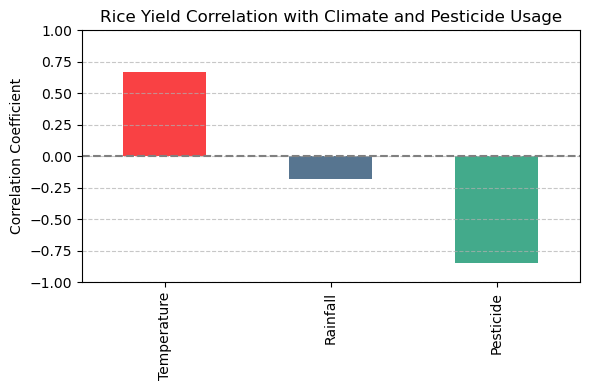

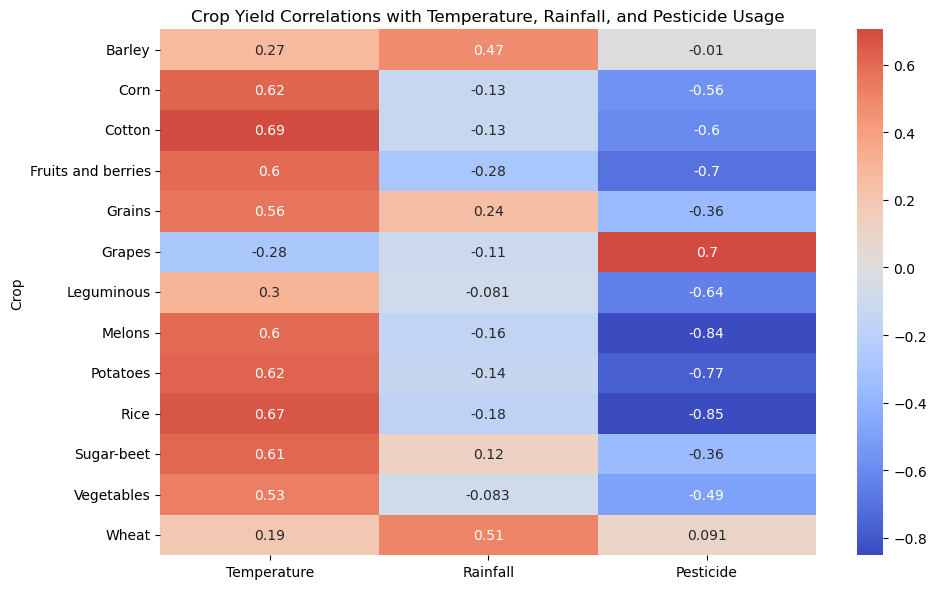

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    "Crop": ["Barley", "Corn", "Cotton", "Fruits and berries", "Grains", "Grapes", "Leguminous", "Melons",
             "Potatoes", "Rice", "Sugar-beet", "Vegetables", "Wheat"],
    "Temperature": [0.2705, 0.6180, 0.6946, 0.5984, 0.5601, -0.2773, 0.2985, 0.5983, 0.6220, 0.6655, 0.6079, 0.5268, 0.1933],
    "Rainfall": [0.4700, -0.1291, -0.1327, -0.2832, 0.2433, -0.1123, -0.0814, -0.1612, -0.1400, -0.1805, 0.1183, -0.0829, 0.5087],
    "Pesticide": [-0.0101, -0.5617, -0.6007, -0.6991, -0.3593, 0.7046, -0.6423, -0.8396, -0.7735, -0.8514, -0.3592, -0.4947, 0.0910]
}

df = pd.DataFrame(data)
df.set_index("Crop", inplace=True)

# 1. Bar Chart for Rice
rice_corr = df.loc["Rice"]
plt.figure(figsize=(6, 4))
rice_corr.plot(kind="bar", color=["#f94144", "#577590", "#43aa8b"])
plt.title("Rice Yield Correlation with Climate and Pesticide Usage")
plt.ylabel("Correlation Coefficient")
plt.ylim(-1, 1)
plt.axhline(0, color="gray", linestyle="--")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Heatmap of All Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", center=0)
plt.title("Crop Yield Correlations with Temperature, Rainfall, and Pesticide Usage")
plt.tight_layout()
plt.show()


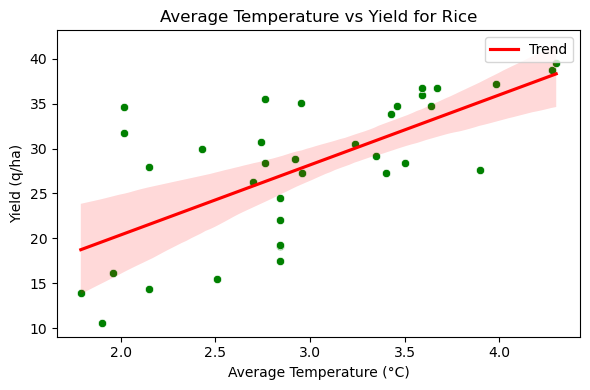

In [73]:
rice_df = yield_df[yield_df['Item'] == 'Rice']

# Example: Scatter plot of Temperature vs Yield for Rice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=rice_df['Average Temperature (°C)'], y=rice_df['q/ha yield'], color='green')
sns.regplot(x=rice_df['Average Temperature (°C)'], y=rice_df['q/ha yield'], scatter=False, color='red', label='Trend')
plt.title("Average Temperature vs Yield for Rice")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Yield (q/ha)")
plt.legend()
plt.tight_layout()
plt.show()

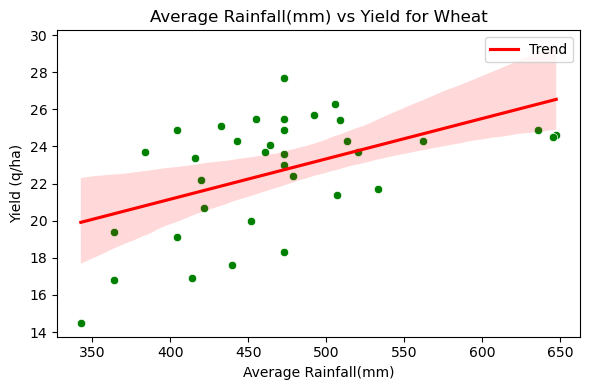

In [74]:
wheat_df = yield_df[yield_df['Item'] == 'Wheat']

# Example: Scatter plot of Temperature vs Yield for Rice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=wheat_df['Average Rainfall(mm)'], y=wheat_df['q/ha yield'], color='green')
sns.regplot(x=wheat_df['Average Rainfall(mm)'], y=wheat_df['q/ha yield'], scatter=False, color='red', label='Trend')
plt.title("Average Rainfall(mm) vs Yield for Wheat")
plt.xlabel("Average Rainfall(mm)")
plt.ylabel("Yield (q/ha)")
plt.legend()
plt.tight_layout()
plt.show()

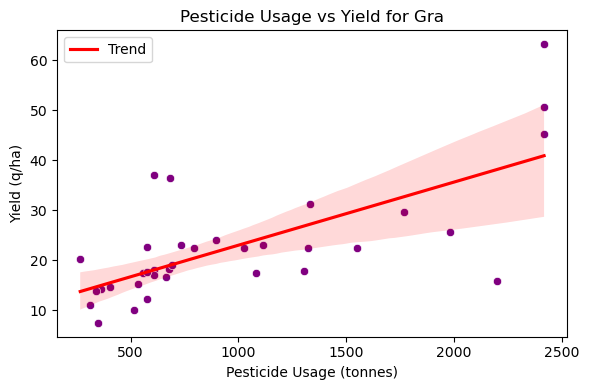

In [75]:
grape_df = yield_df[yield_df['Item'] == 'Grapes']
plt.figure(figsize=(6, 4))
sns.scatterplot(x=grape_df['Pesticide Usage(tonnes)'], y=grape_df['q/ha yield'], color='purple')
sns.regplot(x=grape_df['Pesticide Usage(tonnes)'], y=grape_df['q/ha yield'], scatter=False, color='red', label='Trend')
plt.title("Pesticide Usage vs Yield for Gra")
plt.xlabel("Pesticide Usage (tonnes)")
plt.ylabel("Yield (q/ha)")
plt.legend()
plt.tight_layout()
plt.show()


Grapes (0.7046) – strong positive correlation, suggesting pesticides may effectively support grape yield (possibly due to vulnerability to fungal diseases or pests).

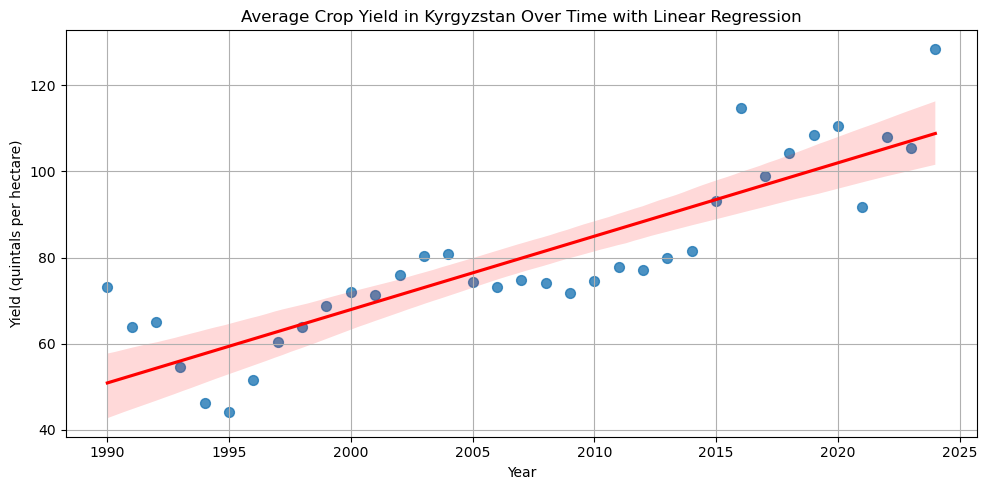

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

avg_yield_by_year = crop.groupby('Year')['q/ha yield'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.regplot(data=avg_yield_by_year, x='Year', y='q/ha yield', marker='o', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Crop Yield in Kyrgyzstan Over Time with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Yield (quintals per hectare)')
plt.grid(True)
plt.tight_layout()
plt.show()

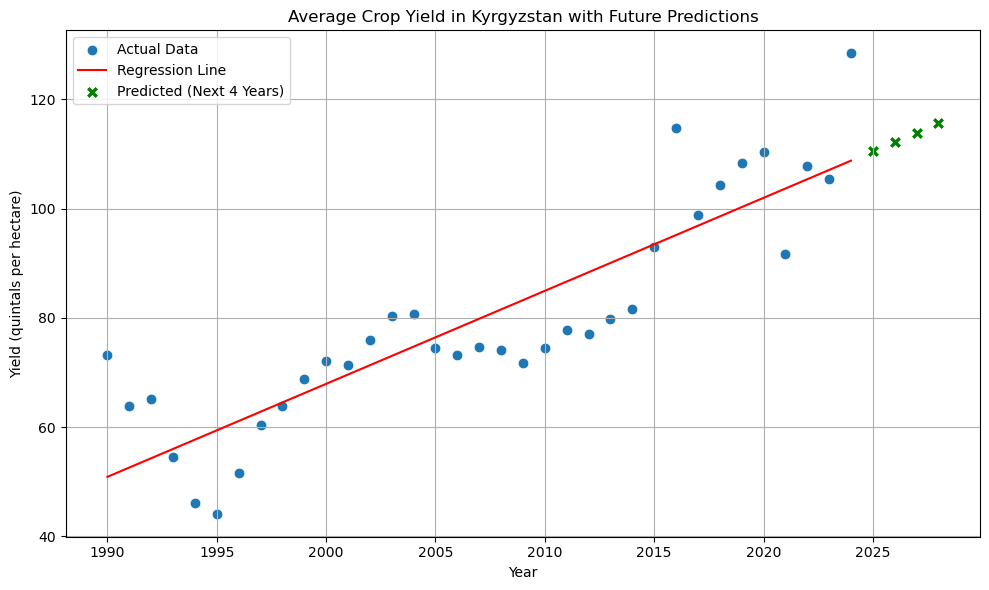

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

avg_yield_by_year = crop.groupby('Year')['q/ha yield'].mean().reset_index()

X = avg_yield_by_year['Year'].values.reshape(-1, 1)
y = avg_yield_by_year['q/ha yield'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

future_years = np.array([X.max() + i for i in range(1, 5)]).reshape(-1, 1)
future_preds = model.predict(future_years)

future_df = pd.DataFrame({'Year': future_years.flatten(), 'q/ha yield': future_preds})
combined_df = pd.concat([avg_yield_by_year, future_df], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_yield_by_year, x='Year', y='q/ha yield', label='Actual Data', s=60)
plt.plot(avg_yield_by_year['Year'], y_pred, color='red', label='Regression Line')
sns.scatterplot(data=future_df, x='Year', y='q/ha yield', label='Predicted (Next 4 Years)', color='green', s=80, marker='X')
plt.title('Average Crop Yield in Kyrgyzstan with Future Predictions')
plt.xlabel('Year')
plt.ylabel('Yield (quintals per hectare)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

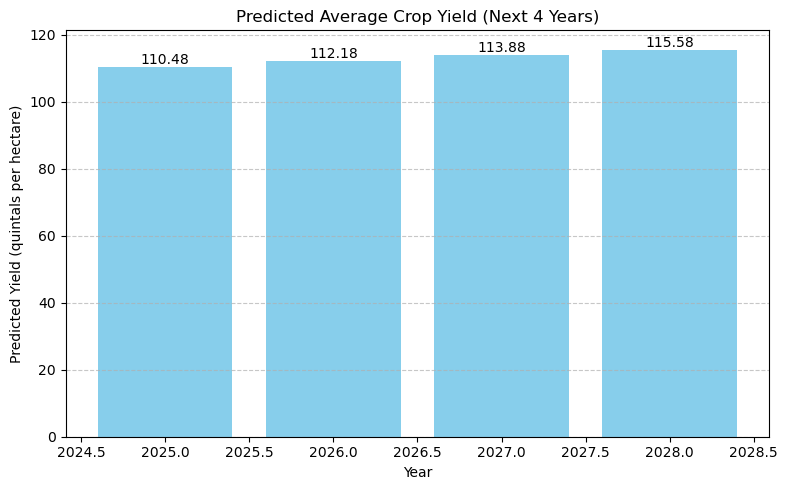

In [78]:
import matplotlib.pyplot as plt

future_years_flat = future_years.flatten()
future_preds_flat = future_preds.flatten()

plt.figure(figsize=(8, 5))
bars = plt.bar(future_years_flat, future_preds_flat, color='skyblue')

for bar, pred in zip(bars, future_preds_flat):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pred:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Predicted Average Crop Yield (Next 4 Years)')
plt.xlabel('Year')
plt.ylabel('Predicted Yield (quintals per hectare)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### References

- National Statistics Committee of Kyrgyz Republic
- World Bank
- Kaggle
- FAOSTAT (FAO) 
- Trading Economics
